In [22]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [7]:
df = pd.read_csv('./test_pred.csv')
df

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
195,195,687_RWF_train1.avi 1,687_RWF_train1.avi,1,[0.0309114 0.9690887],1
196,196,435_RWF_train1.avi 1,435_RWF_train1.avi,1,[0.9973768 0.00262317],0
197,197,273_RWF_train1.avi 1,273_RWF_train1.avi,1,[7.1250106e-05 9.9992877e-01],1
198,198,248_RWF_train1.avi 1,248_RWF_train1.avi,1,[9.1588503e-04 9.9908423e-01],1


In [27]:
true_label = df['true_label'].tolist()
pred_label = df['pred_label'].tolist()

In [31]:
cm = confusion_matrix(true_label, pred_label)
labels = ['Non Violence', 'Violence']

In [29]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[91  9]
 [15 85]]


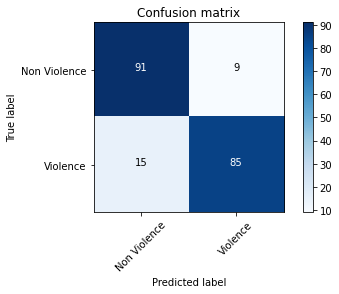

In [30]:
plot_confusion_matrix(cm=cm, classes=labels)